In [12]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex
from scipy import optimize
%matplotlib inline


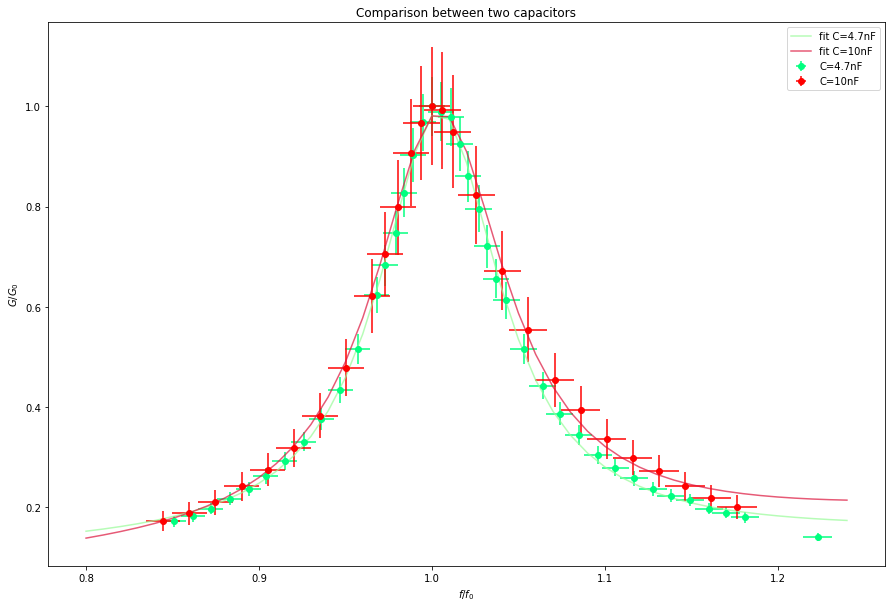

In [39]:
lor_5=pd.read_csv('47nF.txt')
lor_10=pd.read_csv('10nF.txt')

f1 = lor_5['Frequenze normalizzate']
G1 = lor_5['Guadagni normalizzati']
errf1 = lor_5['errF']
errG1 = lor_5['errG']

f2 = lor_10['Frequenze normalizzate']
G2 = lor_10['Guadagni normalizzati']
errf2 = lor_10['errF']
errG2 = lor_10['errG']

def lorentzian(f, I, f_0, S, a, b):
    return I/(1+((f-f_0)/S)**2)+a*f+b
x_fit= np.arange(0.8,1.25,0.01)

fig=plt.figure(figsize=(15,10))
plt.errorbar(f1, G1, yerr=errG1, xerr=errf1, errorevery=1, color='springgreen', fmt='o',label='C=4.7nF')
plt.errorbar(f2, G2, yerr=errG2, xerr=errf2, errorevery=1, color='red', fmt='o',label='C=10nF')
p_1, cov_1 = curve_fit(lorentzian, f1, G1, [0.8, 1, -0.08, 0.01, 0])
p_2, cov_2 = curve_fit(lorentzian, f2, G2, [0.8, 1, -0.08, 0.01, 0])
plt.plot(x_fit,lorentzian(x_fit,*p_1), '-', color='palegreen', alpha=0.7, label='fit C=4.7nF')
plt.plot(x_fit,lorentzian(x_fit,*p_2), '-', color='crimson', alpha=0.7, label='fit C=10nF')


plt.title('Comparison between two capacitors')
plt.xlabel('$f/f_0$')
plt.ylabel('$G/G_0$')
plt.legend()
plt.show()
